
## Dr. Michael Mahesh K Saveetha Engineering College
- michaelmaheshk@gmail.com 
- ANN based Multi-Class Classification using Iris Dataset
- 19AI413-Deep Learning and Its Applications
- Unit - 1 
- 03/05
- EVEN SEM ( Slot: 4Z4-1 & 4U2-1)

Step 1: Import Required Libraries

In [1]:
import torch  
import torch.nn as nn  
import torch.nn.functional as F  
from torch.utils.data import Dataset, DataLoader  
from sklearn.model_selection import train_test_split  

import pandas as pd  
import matplotlib.pyplot as plt  
%matplotlib inline  


In [3]:
# Define the Model class
class Model(nn.Module):
    def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
        super().__init__()
        self.fc1 = nn.Linear(in_features, h1)    # Input layer
        self.fc2 = nn.Linear(h1, h2)             # Hidden layer
        self.out = nn.Linear(h2, out_features)   # Output layer
        
    def forward(self, x):
        x = F.relu(self.fc1(x))  # Activation function for first hidden layer
        x = F.relu(self.fc2(x))  # Activation function for second hidden layer
        x = self.out(x)          # Output layer (no activation, raw scores)
        return x


In [4]:
# Instantiate the Model class using parameter defaults
torch.manual_seed(32)  # For reproducibility
model = Model()

Step 3: Load the Iris Dataset

In [6]:
df = pd.read_csv('iris.csv')
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


Step 4: Perform Train/Test Split

In [7]:
X = df.drop('target', axis=1).values  
y = df['target'].values  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)  
X_train = torch.FloatTensor(X_train)  
X_test = torch.FloatTensor(X_test)  
# y_train = F.one_hot(torch.LongTensor(y_train))  # Not needed with CrossEntropyLoss  
# y_test = F.one_hot(torch.LongTensor(y_test))  
y_train = torch.LongTensor(y_train)  
y_test = torch.LongTensor(y_test)  


Step 5: Prepare DataLoader


In [8]:
trainloader = DataLoader(X_train, batch_size=60, shuffle=True)

testloader = DataLoader(X_test, batch_size=60, shuffle=False)

Step 6: Define Loss Function and Optimizer


In [9]:
# FOR REDO
torch.manual_seed(4)
model = Model()

In [10]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

Step 7: Train the Model

In [11]:
epochs = 100
losses = []

for i in range(epochs):
    i+=1
    y_pred = model.forward(X_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss)
    
    # a neat trick to save screen space:
    if i%10 == 1:
        print(f'epoch: {i:2}  loss: {loss.item():10.8f}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch:  1  loss: 1.09568226
epoch: 11  loss: 0.98190629
epoch: 21  loss: 0.75652373
epoch: 31  loss: 0.49447373
epoch: 41  loss: 0.34981722
epoch: 51  loss: 0.22807978
epoch: 61  loss: 0.13547556
epoch: 71  loss: 0.09162242
epoch: 81  loss: 0.07378437
epoch: 91  loss: 0.06546317


Step 8: Plot the Loss Function

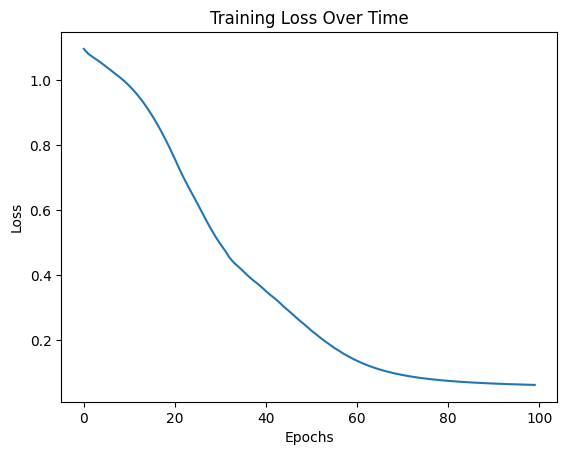

In [12]:
plt.plot(range(epochs), [loss.detach().numpy() for loss in losses])  
plt.xlabel('Epochs')  
plt.ylabel('Loss')  
plt.title('Training Loss Over Time')  
plt.show() 

Step : 9 Validate the Model

In [13]:
# TO EVALUATE THE ENTIRE TEST SET
with torch.no_grad():
    y_val = model.forward(X_test)
    loss = criterion(y_val, y_test)
print(f'{loss:.8f}')

0.06247775


- The test set is passed through the model without calculating gradients.
- The loss function (criterion) computes the test loss based on predictions.
- The loss value is printed to compare with training loss.

In [14]:
correct = 0
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_val = model.forward(data)
        print(f'{i+1:2}. {str(y_val):38}  {y_test[i]}')
        if y_val.argmax().item() == y_test[i]:
            correct += 1
print(f'\n{correct} out of {len(y_test)} = {100*correct/len(y_test):.2f}% correct')

 1. tensor([-0.3360,  7.3629,  1.3780])     1
 2. tensor([0.2770, 8.1552, 0.4267])        1
 3. tensor([ 11.9968,   6.1842, -19.1980])  0
 4. tensor([-2.0192,  7.9662,  4.2445])     1
 5. tensor([-6.1353,  7.9516, 11.0908])     2
 6. tensor([-10.2640,   8.3102,  17.9992])  2
 7. tensor([ 12.0541,   6.4316, -19.2913])  0
 8. tensor([ 12.9496,   6.4815, -20.7530])  0
 9. tensor([-5.7727,  8.2435, 10.5079])     2
10. tensor([-7.8872,  8.6126, 14.0726])     2
11. tensor([-8.7060,  8.6074, 15.4331])     2
12. tensor([ 11.6348,   5.8164, -18.6210])  0
13. tensor([-8.1013,  8.2331, 14.3883])     2
14. tensor([-2.0796,  7.7751,  4.3185])     1
15. tensor([-6.0833,  8.3916, 11.0582])     2
16. tensor([0.1354, 7.8658, 0.6407])        1
17. tensor([-4.0880,  7.7216,  7.6638])     2
18. tensor([ 13.1511,   6.5907, -21.0787])  0
19. tensor([-1.5649,  8.0220,  3.4751])     1
20. tensor([-6.2865,  8.9727, 11.4244])     2
21. tensor([ 12.3848,   6.2568, -19.8265])  0
22. tensor([ 13.8199,   7.0854, -2

# Note :
- Iterates through each test sample and makes a prediction.
- Prints both the predicted values and actual label for comparison.
- Uses argmax() to extract the highest probability class and compares it with the actual label.
- Counts correctly classified samples
- Calculates accuracy by dividing correct predictions by total test samples.
- Formats and prints the accuracy percentage.

### ** Step : 10 Saving and Loading a Trained Model**

#### **Two Methods to Save and Load a Model**

1. **Save and Load Model State Dict (Recommended Method)**
   - **Saves only learned parameters**, not the model architecture.
   - Requires redefining the model class before loading.
   - **Save:**  
     ```python
     torch.save(model.state_dict(), PATH)
     ```
   - **Load:**
     ```python
     model = TheModelClass(*args, **kwargs)  
     model.load_state_dict(torch.load(PATH))  
     model.eval()
     ```

2. **Save and Load Entire Model (Includes Class & Parameters)**
   - **Saves the full model** as a pickle file.
   - Must ensure the model class and dependencies are available when loading.
   - **Save:**  
     ```python
     torch.save(model, PATH)
     ```
   - **Load:**  
     ```python
     model = torch.load(PATH)  
     model.eval()
     ```

#### **Important Notes**
- **Call `model.eval()` before inference** to set dropout and batch normalization layers to evaluation mode.
- **Use state_dict saving for portability** (preferred for deployment).
- **Use full model saving for ease of use** (useful for quick reloading in the same environment).
- **More details**: [PyTorch Model Saving Guide](https://pytorch.org/tutorials/beginner/saving_loading_models.html)


In [17]:
torch.save(model.state_dict(), 'IrisDatasetModel.pt')

- Load a New Model
- We'll create a new model instance and load the saved state dictionary to restore the trained weights

In [18]:
new_model = Model()
new_model.load_state_dict(torch.load('IrisDatasetModel.pt'))
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

- Evaluate the Loaded Model
- After loading the trained model, we test it on the test dataset to ensure it performs as expected.

In [19]:
with torch.no_grad():
    y_val = new_model.forward(X_test)
    loss = criterion(y_val, y_test)
print(f'{loss:.8f}')

0.06247775


- Classifying Unseen Data
- After loading the trained model, we can use it to predict the class of a new, unseen iris flower.

In [21]:
mystery_iris = torch.tensor([5.6,3.7,2.2,0.5])

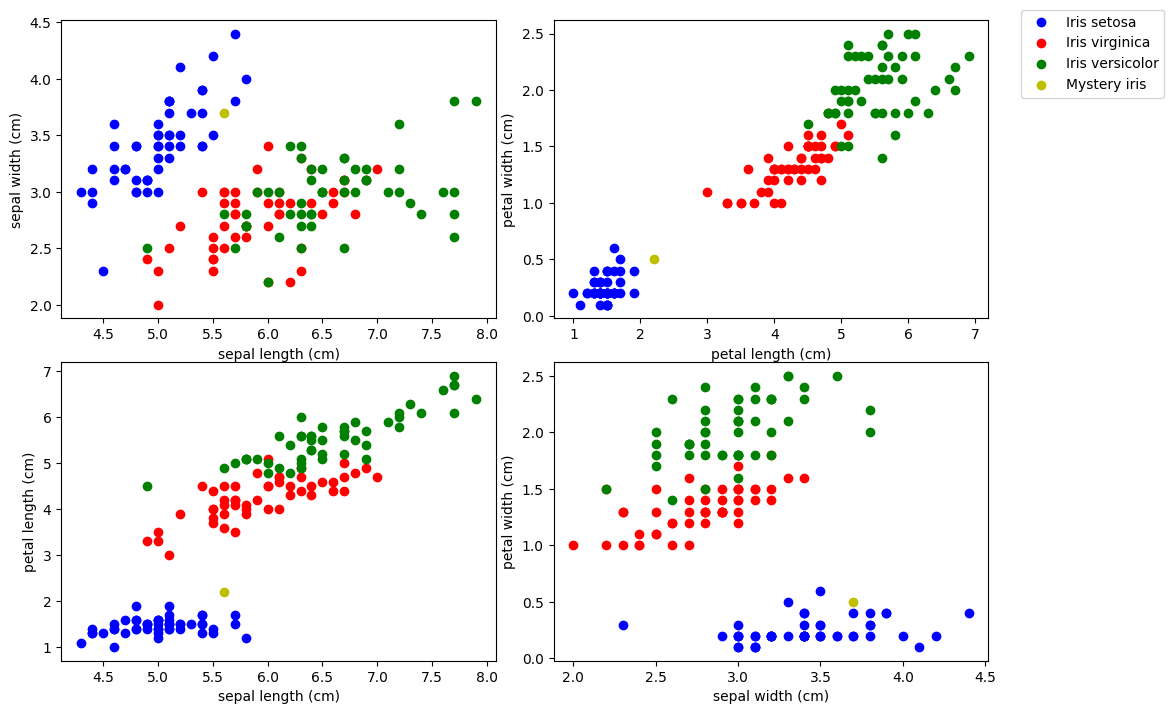

In [24]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,7))
fig.tight_layout()

plots = [(0,1),(2,3),(0,2),(1,3)]
colors = ['b', 'r', 'g']
labels = ['Iris setosa','Iris virginica','Iris versicolor','Mystery iris']

for i, ax in enumerate(axes.flat):
    for j in range(3):
        x = df.columns[plots[i][0]]
        y = df.columns[plots[i][1]]
        ax.scatter(df[df['target']==j][x], df[df['target']==j][y], color=colors[j])
        ax.set(xlabel=x, ylabel=y)
        
    # Add a plot for our mystery iris:
    ax.scatter(mystery_iris[plots[i][0]],mystery_iris[plots[i][1]], color='y')
    
fig.legend(labels=labels, loc=3, bbox_to_anchor=(1.0,0.85))
plt.show()

In [25]:
with torch.no_grad():
    print(new_model(mystery_iris))
    print()
    print(labels[new_model(mystery_iris).argmax()])

tensor([ 12.2112,   7.1279, -19.5248])

Iris setosa



## Dr. Michael Mahesh K Saveetha Engineering College
- michaelmaheshk@gmail.com 
- ANN based Multi-Class Classification using Iris Dataset
- 19AI413-Deep Learning and Its Applications
- Unit - 1 
- 03/05
- EVEN SEM ( Slot: 4Z4-1 & 4U2-1)
